In [1]:
import tensorflow
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import TimeDistributed
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
f50 = np.load("f50.npy")
f100 = np.load("f100.npy")
f150 = np.load("f150.npy")
f200 = np.load("f200.npy")
f50_100 = np.load("f50_100.npy")

In [3]:
f50_100_target = []
for i in range(100):
    zero_um = (0,1)
    f50_100_target.append(zero_um)

for i in range(100):
    um_zero = (1,0)
    f50_100_target.append(um_zero)

In [4]:
# f50_100_target

In [5]:
X = np.reshape(f50_100, (200, 1000, 1))
y = np.array(f50_100_target)

In [6]:
y

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [7]:
import math
n_input_layer = 1000
n_output_layer = 1
n_hidden_layer = round(math.sqrt((n_input_layer*n_output_layer)))
print("nro de neurônios na hidden layer:", n_hidden_layer)

nro de neurônios na hidden layer: 32


In [8]:
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [9]:
model=Sequential()
model.add(SimpleRNN(n_hidden_layer, 
                    input_shape=(1000,1), 
                    kernel_initializer='random_normal'))
model.add(Dense(2, activation='sigmoid'))
# model.compile(loss = 'mse', optimizer = 'rmsprop')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 1,154
Trainable params: 1,154
Non-trainable params: 0
_________________________________________________________________


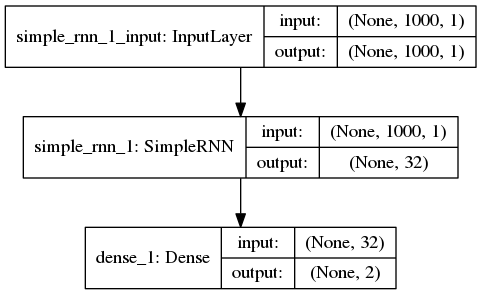

In [10]:
from keras.utils.vis_utils import plot_model
import graphviz
from interface import implements, Interface
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [12]:
history = model.fit(X, y, epochs = 20, batch_size = 32, callbacks=[es])

Epoch 1/20
200/200 [==============================] - 2s 8ms/step - loss: 0.6325 - accuracy: 0.5000
Epoch 2/20
 32/200 [===>..........................] - ETA: 0s - loss: 0.5514 - accuracy: 0.5000

/home/ryo/miniconda/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


200/200 [==============================] - 1s 6ms/step - loss: 0.4967 - accuracy: 0.8475
Epoch 3/20
200/200 [==============================] - 1s 6ms/step - loss: 0.3595 - accuracy: 1.0000
Epoch 4/20
200/200 [==============================] - 1s 6ms/step - loss: 0.3557 - accuracy: 0.9200
Epoch 5/20
200/200 [==============================] - 1s 6ms/step - loss: 0.1881 - accuracy: 1.0000
Epoch 6/20
200/200 [==============================] - 1s 7ms/step - loss: 0.2198 - accuracy: 0.9550
Epoch 7/20
200/200 [==============================] - 1s 6ms/step - loss: 0.1218 - accuracy: 1.0000
Epoch 8/20
200/200 [==============================] - 1s 7ms/step - loss: 0.1033 - accuracy: 1.0000
Epoch 9/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0848 - accuracy: 1.0000
Epoch 10/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0704 - accuracy: 1.0000
Epoch 11/20
200/200 [==============================] - 1s 6ms/step - loss: 0.0613 - accuracy: 1.0000
Epoch 12/

In [13]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


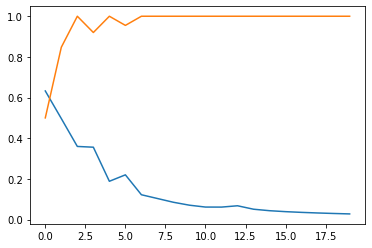

In [14]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['accuracy'], label='test')

In [15]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [16]:
pi = 3.1415
N = 1000
t = np.arange(0,N)
f = 100

In [17]:
qtd_amostras = 20
test = []
test_target = []

f = 50
for onda_da_frequencia in range(qtd_amostras):
    x=np.sin(2*pi*f*t+np.random.rand(1)) 
    test_target.append(zero_um)
    test.append(x)
    
f = 100
for onda_da_frequencia in range(qtd_amostras):
    x=np.sin(2*pi*f*t+np.random.rand(1))    
    test_target.append(um_zero)
    test.append(x)
    
test = np.reshape(test, (40, 1000, 1))

In [18]:
predictions = model.predict(test)
for i in range(len(test)):
    print(predictions[i], 'expected', test_target[i])

[0.03015833 0.97622716] expected (0, 1)
[0.03052182 0.97963446] expected (0, 1)
[0.03014984 0.9784797 ] expected (0, 1)
[0.03006334 0.9776342 ] expected (0, 1)
[0.03008364 0.9779863 ] expected (0, 1)
[0.03047872 0.97954226] expected (0, 1)
[0.03055263 0.97969717] expected (0, 1)
[0.03008447 0.97799563] expected (0, 1)
[0.03009618 0.97811264] expected (0, 1)
[0.03018382 0.9786485 ] expected (0, 1)
[0.03060669 0.9798013 ] expected (0, 1)
[0.03050869 0.979607  ] expected (0, 1)
[0.03049654 0.97958106] expected (0, 1)
[0.03021881 0.9787965 ] expected (0, 1)
[0.03055858 0.97970897] expected (0, 1)
[0.03006117 0.9775261 ] expected (0, 1)
[0.03015925 0.9762211 ] expected (0, 1)
[0.03048098 0.9795472 ] expected (0, 1)
[0.03007698 0.9769682 ] expected (0, 1)
[0.03020463 0.9787391 ] expected (0, 1)
[0.9694389  0.02116174] expected (1, 0)
[0.9698967  0.02319332] expected (1, 0)
[0.9698424 0.0225407] expected (1, 0)
[0.9691965 0.020719 ] expected (1, 0)
[0.9698288  0.02244985] expected (1, 0)
[0.9

In [19]:
test_target_arr = np.array(test_target)

In [20]:
predictions_rounded = np.matrix.round(predictions)

In [21]:
y_test_classes = test_target_arr.argmax(1)
y_pred_classes = predictions_rounded.argmax(1)

In [22]:
y_pred_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
y_test_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred_classes, y_test_classes)

In [25]:
print(matrix)

[[20  0]
 [ 0 20]]
